<h1 align="center"> Data Exploration on NYC Airbnb </b> </h1><br>

### Abstract

##### _Overview of this notebook_

Airbnb recently becomes one of the most popular platform that expand the travelling possibilities and bring in a more unique, personalised way to experiencing the world and travelling overseas. Data analysis on a huge datase provided by Airbnb is a crucial factor for the company itself, but also to discover hidden insights cannot be seem in tabular data  alone such as the most popular neighbourhood group, room_type or average price ranges. <br> <br>
With millions row of generated data are analysed, insights and discovered patterns can be used for security, business data-driven decisions making process, understanding of customers' and providers' behaviour, among others.

### Data source
##### _Overview of data source used in this notebook_

This .csv dataset contain around 49,000 observations or instances with mixed of between categorical and numerical attributes distributed into 16 separated columns.
<br>
The data can be viewed on Kaggle in following [link](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data)

## Breakdown of this notebook:
1. **Importing Libraries**
2. **Acquiring and Loading the Dataset**
3. **Data Cleaning, Wrangling and Understanding**
4. **Exploring and Visualising Data**

## Importing Libraries

In [1]:
# Importing required libraries for the analysis and visualisation of the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Ignoring messages involved with packages
import warnings
warnings.filterwarnings('ignore')

## Acquiring and Loading the Dataset

In [3]:
# Utilising pandas library and "read_csv" function to read the Airbnb file downloaded from Kaggle.
# The dataset can be viewed from the following link:
df = pd.read_csv("AB_NYC_2019.csv")

# Examining first 5 instances of the Airbnb file
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
# Checking amount of rows/instances in the dataset to understand the size of data we are working with
len(df)

48895

In [5]:
# Checking data type of every column/feature in the dataset
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

## Data Cleaning, Wrangling and Understanding

As there are some NaN values can be noticed through initial exploration of the dataset in the above section. Therefore, examine missing values is required before continuin with analysis

In [6]:
# Examining which columns contain null values
# "sum" function supports the finding of total missing values in each column in the dataset
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Due to this analysis and the nature of the dataset, observed missing values do not required extreme treatment and further statements can be made with those values, which including:

* The column "host_name" is irrelevant and insignificant for the analysis process on this Airbnb dataset. Also, de-identification is applied on the feature to avoid ethical issues and bias analysis based on host's name.

* With the "last_review" feature, it is a date datatype and if there is no existing reviews on the list, the date of review does not exist.

* "review_per_month" is an average of reviews that the accomondation received per month. This column can be applied with 0.0 for missing values due to following the logical of received 0 total reviews in "number_of_reviews" feature means it will receive 0.0 rate of reviews per month.

Let's proceed to removing and handling columns that contain missing data

In [7]:
# Dropping features that are insignificant for the analysis and potentially un-ethical for conducting analysis and prediction
df.drop(['id', "host_name", "last_review"], axis=1, inplace=True)

# Review the change
df.head(5)

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [8]:
# Replacing NaN values in "reviews_per_month" column follwed by above mentioned logical
df.fillna({"reviews_per_month":0}, inplace=True)

# Review the change
df.reviews_per_month.isnull().sum()

0

In [9]:
# Exploring other categorical values

# Examining the unique values of neighbourhood_group as this column might correlate with other in later analysis
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [10]:
# Examining the unique values of "neighbourhood" column. This feature might be effective for the analysis as "neighbourhood_group"
df.neighbourhood.nunique()

221

In [11]:
# Examining unique values of "room_type" as it might correlate with the determination of room price later on
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

## Exploring and Visualising Data
###### Exploring the data through visualising the features' values and correlation between different features and visual analytics.
###### This section includes the explanation of the process and the results

The process of exploring the data with visual analytics is conducted from left to right of the dataset's features. <br>
This approach would be effective when exploring larger dataset with numerous attributes and allow remembering which feature was explored individually to ensure obtaining much knowledge from the dataset as possible.

In [12]:
# Setting figure configuration for the visualisation
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style("white")

In [13]:
# Obtaining most popular hosts on Airbnb platform
df.host_id.value_counts().head(20)

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
7503643       52
1475015       52
120762452     50
2856748       49
205031545     49
190921808     47
26377263      43
2119276       39
19303369      37
25237492      34
119669058     34
Name: host_id, dtype: int64

In [14]:
# Taking advantage of most popular hosts with greater or equal to 50 times of listing on the dataset and storing in separated dataframe.
top_host = pd.DataFrame(df.host_id.value_counts().head(12))
top_host.reset_index(inplace=True)
top_host.rename(columns={"index":"Host_ID", "host_id": "Count"}, inplace=True)
top_host

,Host_ID,Count
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,16098958,96
5,12243051,96
6,61391963,91
7,22541573,87
8,200380610,65
9,7503643,52


[Text(0, 0, '1475015'),
 Text(1, 0, '7503643'),
 Text(2, 0, '12243051'),
 Text(3, 0, '16098958'),
 Text(4, 0, '22541573'),
 Text(5, 0, '30283594'),
 Text(6, 0, '61391963'),
 Text(7, 0, '107434423'),
 Text(8, 0, '120762452'),
 Text(9, 0, '137358866'),
 Text(10, 0, '200380610'),
 Text(11, 0, '219517861')]

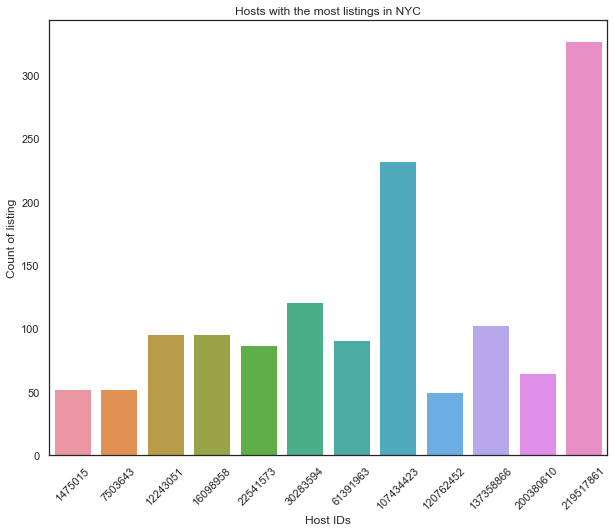

In [15]:
# Using barplot to visualise the total count number of most popular host on Airbnb platform.
viz_1 = sns.barplot(x="Host_ID", y="Count", data=top_host)
viz_1.set_title("Hosts with the most listings in NYC")
viz_1.set_ylabel("Count of listing")
viz_1.set_xlabel("Host IDs")
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)

From the first visualisation, we can observe that the host "219517861" was listed 300+ times while there is a good distribution among others.

Text(0, 0.5, 'Count of listing')

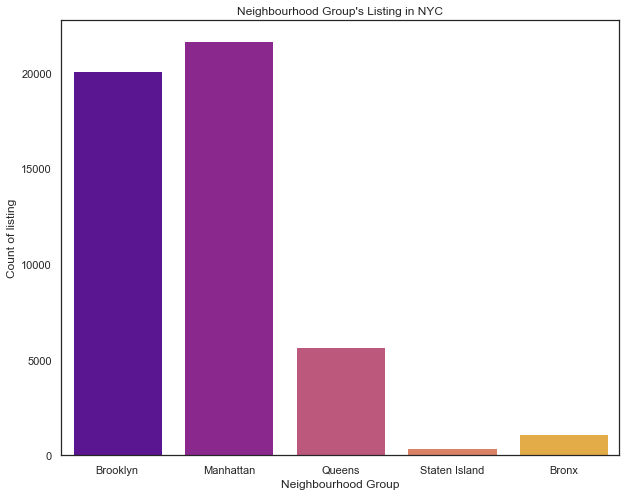

In [16]:
# Examining the most popular or most listed neighbourhood group of NYC on Airbnb platform.
viz_2 = sns.countplot(df["neighbourhood_group"], palette="plasma")
viz_2.set_title("Neighbourhood Group's Listing in NYC")
viz_2.set_xlabel("Neighbourhood Group")
viz_2.set_ylabel("Count of listing")

Again, from the visualisation, we can see that "Brooklyn" and "Manhattan" are two most popular neighbourhood group in NYC. The assumption can be made here was that those two neighbourhood group are the most well-known groups and tourist or traveller would like to stay in these areas.

In [17]:
top_neighbourhood = pd.DataFrame(df.neighbourhood.value_counts().head(10))
top_neighbourhood.reset_index(inplace=True)
top_neighbourhood.rename(columns={"index": 'Neighbourhood', 'neighbourhood': "Count"}, inplace=True)
top_neighbourhood

,Neighbourhood,Count
0,Williamsburg,3920
1,Bedford-Stuyvesant,3714
2,Harlem,2658
3,Bushwick,2465
4,Upper West Side,1971
5,Hell's Kitchen,1958
6,East Village,1853
7,Upper East Side,1798
8,Crown Heights,1564
9,Midtown,1545


[Text(0, 0, 'Williamsburg'),
 Text(1, 0, 'Bedford-Stuyvesant'),
 Text(2, 0, 'Harlem'),
 Text(3, 0, 'Bushwick'),
 Text(4, 0, 'Upper West Side'),
 Text(5, 0, "Hell's Kitchen"),
 Text(6, 0, 'East Village'),
 Text(7, 0, 'Upper East Side'),
 Text(8, 0, 'Crown Heights'),
 Text(9, 0, 'Midtown')]

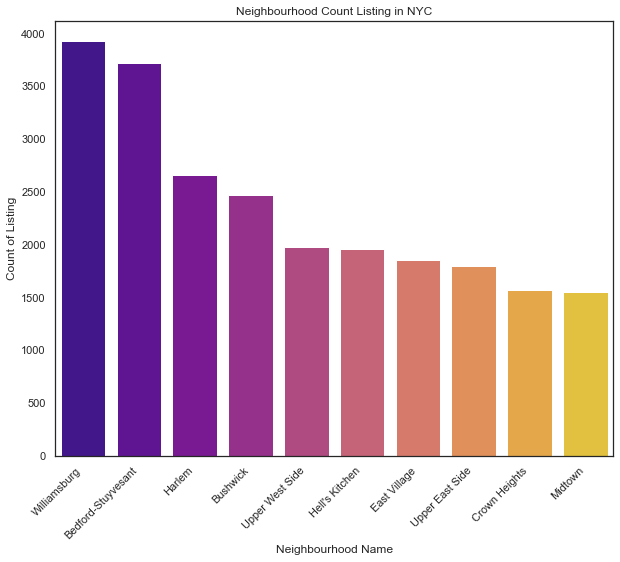

In [18]:
# Examining the most listed neighbourhood in NYC
viz_3 = sns.barplot(x="Neighbourhood", y="Count", data=top_neighbourhood, palette="plasma")
viz_3.set_title("Neighbourhood Count Listing in NYC")
viz_3.set_xlabel("Neighbourhood Name")
viz_3.set_ylabel("Count of Listing")
viz_3.set_xticklabels(viz_3.get_xticklabels(), rotation=45, ha="right")

Text(0.5, 0, 'Room')

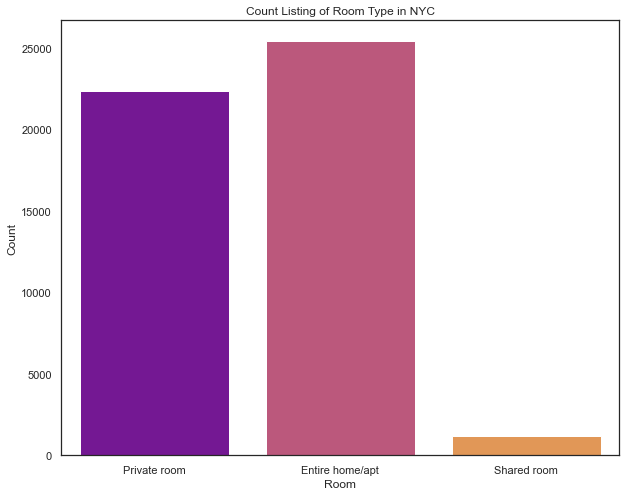

In [19]:
# Examining most listed room type for rent on Airbnb platform of NYC
viz_4 = sns.countplot(df.room_type, palette="plasma")
viz_4.set_title("Count Listing of Room Type in NYC")
viz_4.set_ylabel("Count")
viz_4.set_xlabel("Room")

Interesting, most of the listed room_types on Airbnb platform are "Private room" and "Entire home/apt". This assumes that most tourists prefer to rent an entire room or home for their conform and privacy; as a result, the host understand the psychological reasons behind and utilise it for better experience.

In [20]:
# Further exploration on neighbourhood groups

# Brooklyn
brooklyn_price = df.loc[df['neighbourhood_group'] == 'Brooklyn'][["price"]]
# Manhattan
manhattan_price = df.loc[df['neighbourhood_group'] == 'Manhattan'][["price"]]
# Queens
queens_price = df.loc[df['neighbourhood_group'] == 'Queens'][["price"]]
# Staten Island
staten_price = df.loc[df['neighbourhood_group'] == 'Staten Island'][["price"]]
# Bronx
bronx_price = df.loc[df['neighbourhood_group'] == 'Bronx'][["price"]]
neighbourhood_group_list = ["Brooklyn", 'Manhattan', 'Queens', 'Staten Island', 'Bronx']

# Assigning all the prices dataframe in a list for the exploration between neighbourhood group and rent price
price_list_by_neighbourhood_group = [brooklyn_price, manhattan_price, queens_price, staten_price, bronx_price]

In [21]:
price_stats_df = []  # Empty list for appending price distribution for each neighbourhood_group

# for-loop is utilised to obtain statistical information on price range of each neighbourhood_group
# and append in to defined empty list.
for price_list in price_list_by_neighbourhood_group:
    x = price_list.describe()
    # Only obtain min, 1st percentile, 2nd percentile, 3rd percentile and max price in the price range
    x = x.iloc[3:]
    x.reset_index(inplace=True)
    x.rename(columns={'index':'Stats'}, inplace=True)
    price_stats_df.append(x)

# Renaming price column to its associated neighbourhood groups for more readability.
for i in range(0, len(neighbourhood_group_list)):
    price_stats_df[i].rename(columns={'price':neighbourhood_group_list[i]}, inplace=True)

# Finalising the dataframe for final view
price_stats_df = [df.set_index('Stats') for df in price_stats_df]
price_stats_df = price_stats_df[0].join(price_stats_df[1:])
price_stats_df

,Brooklyn,Manhattan,Queens,Staten Island,Bronx
Stats,,,,,
min,0.0,0.0,10.0,13.0,0.0
25%,60.0,95.0,50.0,50.0,45.0
50%,90.0,150.0,75.0,75.0,65.0
75%,150.0,220.0,110.0,110.0,99.0
max,10000.0,10000.0,10000.0,5000.0,2500.0


From the statistical table, there are some extreme values, such as $\$10000$ for a night in some of the accommodation in Brooklyn, Manhattan and Queens. Therefore, removing them and obtaining the price range lower than $\$400$ for better visualisation

Text(0, 0.5, 'Price')

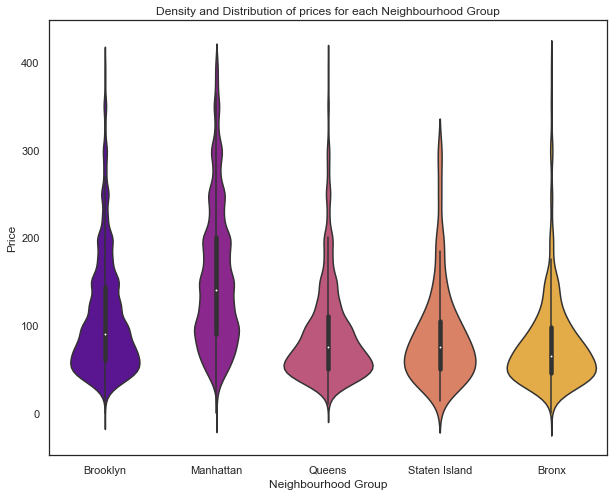

In [22]:
# Create visualisation using violin plot without extreme value / less than 400 to showcase density and distribution of prices
viz_5 = sns.violinplot(data=df[df.price<400], x='neighbourhood_group', y='price', palette="plasma")
viz_5.set_title('Density and Distribution of prices for each Neighbourhood Group')
viz_5.set_xlabel("Neighbourhood Group")
viz_5.set_ylabel("Price")

With the combination of a statistical table and a above violin plot, there are few things that can be observed from the them about distribution price.
* First, Manhattan is a neighbourhood group has a higer/wider price ranges with \\$150 as average price from the observation. Also, the price range is evenly distributed from \\$95 - \\$220
* For Brooklyn, the average price of accommodation venues on Airbnb platform is \\$90 per night. However, there is a large number of renting properties in Brooklyn with distribution close to \\$50 price range.
* Both Queens and Staten Island have similar price range distribution of around \\$75, while Bronx is seem to be the cheapest neighbourhood group among all of them.

As a result, the statistic conveys the expectation from those neighbourhood groups, which is Manhattan is one of the most expensive places in the New York City to live in and followed by Brooklyn; where Bronx seems to have lower standards of living and more cheaper to stay in the area.

In [23]:
# As there are over 200 unique neighbourhoods, exploring top 10 listed neighbourhoods would be more effective and better concentration

# Figuring out top 10 neighbourhoods of New York City
df.neighbourhood.value_counts().head(10)

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

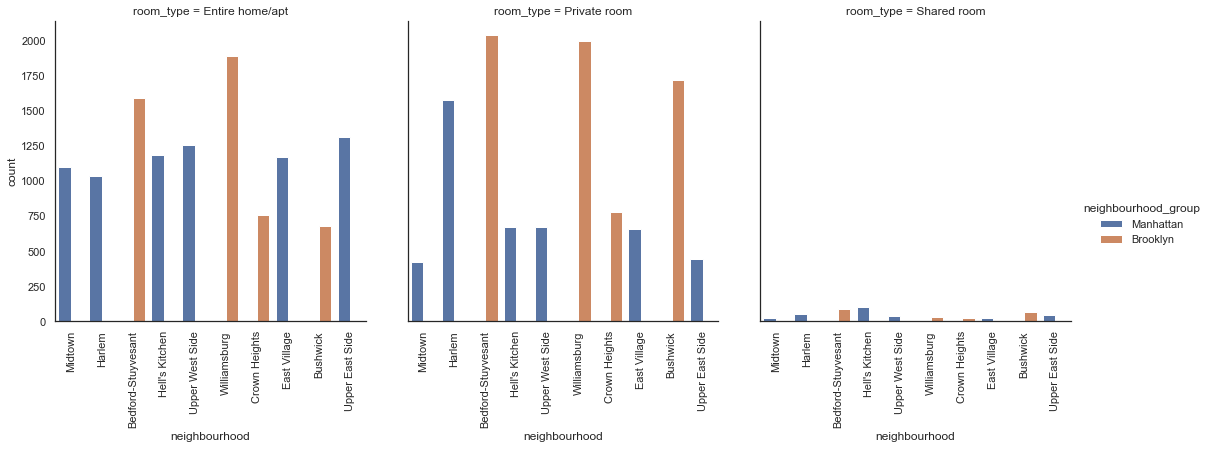

In [24]:
# Obtaining top 10 neighbourhoods for visualisation purposes and sub-dataframe
top_10_neighbourhood = df.loc[df['neighbourhood'].isin(['Williamsburg',
                                                        'Bedford-Stuyvesant',
                                                        'Harlem', 'Bushwick',
                                                        'Upper West Side', "Hell's Kitchen",
                                                        "East Village", "Upper East Side",
                                                        "Crown Heights", "Midtown"])]

# Create visulisation using catplot to highlight multiple interesting attributes together and a count
viz_6 = sns.catplot(x="neighbourhood", hue="neighbourhood_group", col="room_type",
                    data=top_10_neighbourhood, kind="count")
viz_6.set_xticklabels(rotation=90)

From the visualisation, there are three subplots - that visualise distributions among other interested attributes. The following insights can be observed:
* Listed "Shared room" type Airbnb is uncommon available among the top 10 most popular neighbourhoods in New York City.
* Only 2 neighbourhood_groups is represented from these 10 neighbourhood, which is Manhattan and Brooklyn. This results can somehow be expected as both Manhattan and Brooklyn are the most famous and travelled destinations for tourist and overseas travellers; therefore, it would have the most listing availability across the dataset.
* Bedford-Stuyvesant, Willianburg and Bushwick are the most popular neighbourhood for Manhattan, while Harlem and Midtown for Brooklyn can be observed through the number of listed room available for each area.

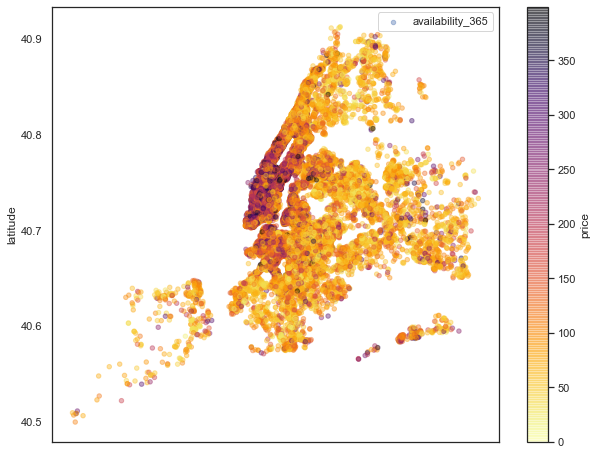

In [25]:
# Create a scatter plot with given longitude and latitude for those without extreme price values.
viz_7 = df[df["price"] < 400].plot(kind="scatter", x="longitude", y="latitude",
                                   label="availability_365", c="price",
                                   cmap=plt.get_cmap("inferno_r"), colorbar=True, alpha=0.4,
                                   figsize=(10,8))
viz_7.legend()

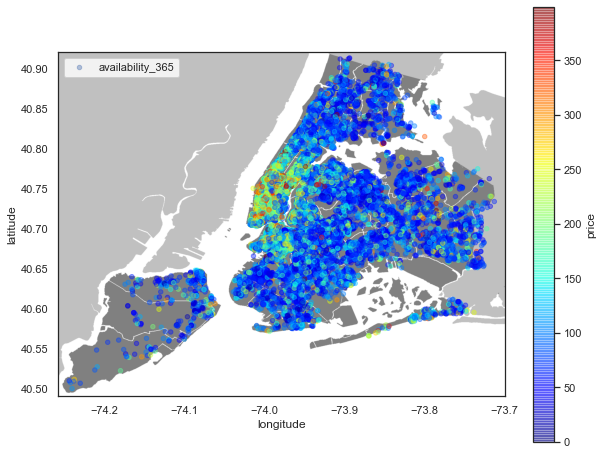

In [26]:
# Initialising the figure size
plt.figure(figsize=(10,8))
# Loading the New York City map from the local file.
# This map image can be downloaded from here: https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG
nyc_img = plt.imread('Neighbourhoods_New_York_City_Map.png')

# Scaling map image with given max and min values of longitude and latitude for proper output.
plt.imshow(nyc_img, zorder=0, extent=[-74.258, -73.7, 40.49, 40.92])
ax = plt.gca()

df[df["price"] < 400].plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price',
                           ax=ax, cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)
plt.legend()
plt.show()

In [27]:
# Exploring the average renting price for each Airbnb accommodation in NYC
price_avg_nyc = df.price.mean()
print("Average price per night for NYC Airbnb: ${}".format(price_avg_nyc))

# This result is somehow screwed by a wide renting price range from the dataset

Average price per night for NYC Airbnb: $152.7206871868289


In [28]:
# Obtaining the top 10 accommodation venues with most reviews on Airbnb platform
top_most_reviewed_list = df.nlargest(10, "number_of_reviews")
top_most_reviewed_list

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
11759,Room near JFK Queen Bed,47621202,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,14.58,2,333
2031,Great Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,7.75,3,293
2030,Beautiful Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,7.72,3,342
2015,Private Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,7.57,3,339
13495,Room Near JFK Twin Beds,47621202,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,13.40,2,173
10623,Steps away from Laguardia airport,37312959,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,543,11.59,5,163
1879,Manhattan Lux Loft.Like.Love.Lots.Look !,2369681,Manhattan,Lower East Side,40.71921,-73.99116,Private room,99,2,540,6.95,1,179
20403,Cozy Room Family Home LGA Airport NO CLEANING FEE,26432133,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,16.22,5,341
4870,Private brownstone studio Brooklyn,12949460,Brooklyn,Park Slope,40.67926,-73.97711,Entire home/apt,160,1,488,8.14,1,269
471,LG Private Room/Family Friendly,792159,Brooklyn,Bushwick,40.70283,-73.92131,Private room,60,3,480,6.70,1,0


In [29]:
# Examining average price of top 10 most reviewed accommodation venues.
price_avg_for_top_10 = top_most_reviewed_list.price.mean()
print("Average price per night for top 10 most reviewed Airbnb: ${}".format(price_avg_for_top_10))

Average price per night for top 10 most reviewed Airbnb: $65.4


In [30]:
# Dropping categorical columns that would not significant to the exploring of correlation between attributes.
airbnb_new_df = pd.DataFrame(df.drop(["name", "host_id", "latitude", "longitude", "number_of_reviews", "reviews_per_month", "neighbourhood"], axis=1))
airbnb_new_df.head(10)

,neighbourhood_group,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,Brooklyn,Private room,149,1,6,365
1,Manhattan,Entire home/apt,225,1,2,355
2,Manhattan,Private room,150,3,1,365
3,Brooklyn,Entire home/apt,89,1,1,194
4,Manhattan,Entire home/apt,80,10,1,0
5,Manhattan,Entire home/apt,200,3,1,129
6,Brooklyn,Private room,60,45,1,0
7,Manhattan,Private room,79,2,1,220
8,Manhattan,Private room,79,2,1,0
9,Manhattan,Entire home/apt,150,1,4,188


Index(['neighbourhood_group', 'room_type', 'price', 'minimum_nights',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

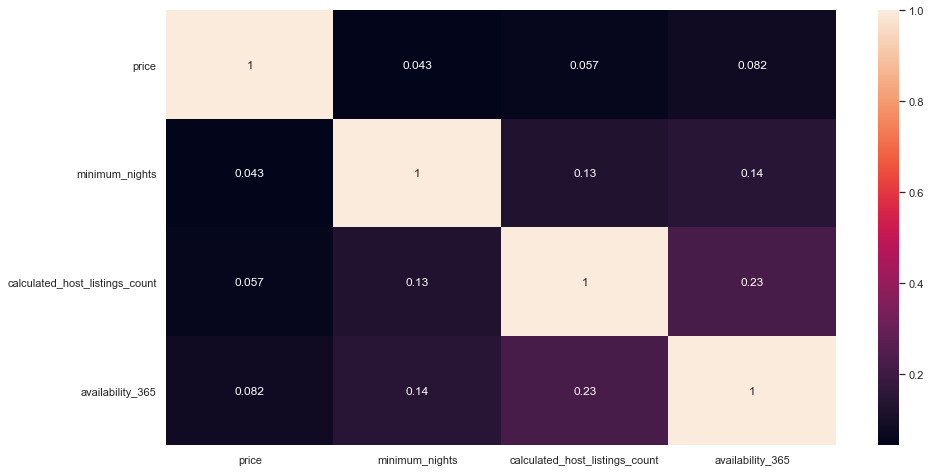

In [31]:
# Examining correlation percentage between attribute in the dataset
corr = airbnb_new_df.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(corr, annot=True)
airbnb_new_df.columns

# However, neighbourhood groups and room tupe did not accounted in this correlation finding.
# As "neighbourhood_group" and "room_type" are categical feature, encoding values would be required.

In [32]:
# Defining function to encode categorical values to 0 and 1
def Encode(dataset):
    for column in dataset.columns[dataset.columns.isin(["neighbourhood_group", "neighbourhood", "room_type"])]:
        dataset[column] = dataset[column].factorize()[0]
    return dataset

airbnb_encoded = Encode(airbnb_new_df.copy())
airbnb_encoded.head(10)

,neighbourhood_group,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,0,0,149,1,6,365
1,1,1,225,1,2,355
2,1,0,150,3,1,365
3,0,1,89,1,1,194
4,1,1,80,10,1,0
5,1,1,200,3,1,129
6,0,0,60,45,1,0
7,1,0,79,2,1,220
8,1,0,79,2,1,0
9,1,1,150,1,4,188


Index(['neighbourhood_group', 'room_type', 'price', 'minimum_nights',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

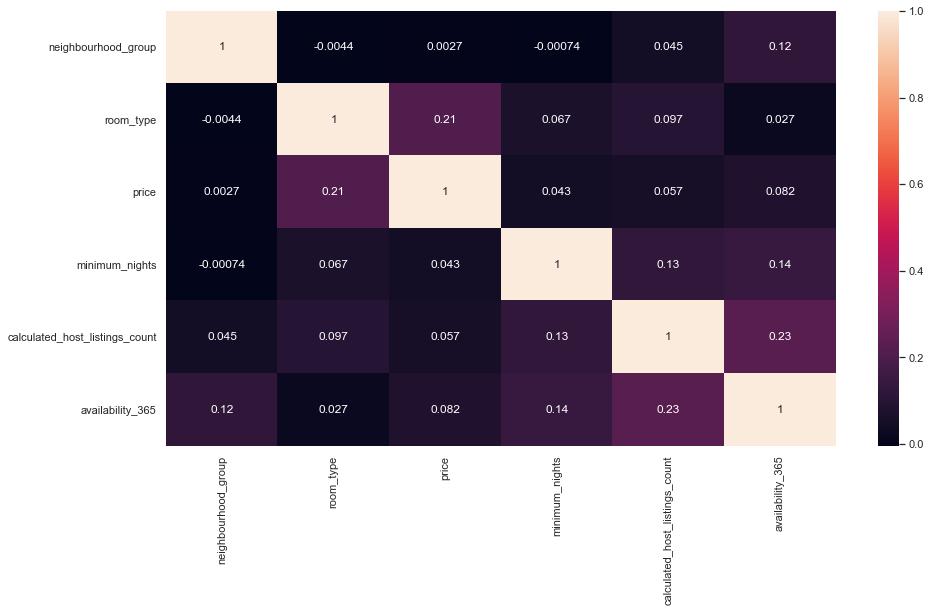

In [33]:
# Create a correlation heatmap for the dataframe with encoded neighbour hood group and room_type
corr_encoded = airbnb_encoded.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(corr_encoded, annot=True)
airbnb_encoded.columns

As from the visualisation, the price tag is correlation with the room_type of each accommodation venue. This can be assumed that with more renting space like entire house, would often have a higher renting price. However, it still denys the causal relationship that more renting space would direct result to higher renting price.

## Conclusion

##### Summarising of our findings

From this 2019 Airbnb dataset, it is a detailed dataset with variety of columns with different associated information which allow more significant exploration on the dataset and understanding Airbnb platform during 2019. Also, through the dataset:
* The Airbnb platform is taken as advantages by the accommodation providers or hosts with 327 listings for the top host that was found in the dataset through the exploration.
* Brooklyn and Manhattan was discovered as two most popular neighbourhood group in the New York City for renting accommodation on Airbnb platform. Also, they are the most expensive area to stay and travel to.
* Identifying the important of de-identification process to avoid any bias analysis and un-ethical related issues.
* The most reviewed listing of host is found and analysed together with additional attributes.


However, for the purpose of analysis and further data exploration, additional review rate on the scale of 5 would further userful in determining the best-reviewed hosts and best services in NYC along side the number_of_reviews that is provided in the dataset. Overall, relationships between features are also discovered and the correlation is unveiled while explanation of each process step is provided.
<br>
From the personal experience, this dataset is somehow a subset of bigger dataset that is utilised for Machine Learning/Data Science projects to gain better data-driven business decision among others